<a href="https://colab.research.google.com/github/Sharath2021/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# importing important libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
#drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing dataset
customer_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Capstone_Unsupervised/Online Retail.xlsx')

### **Data summary**
---

In [4]:
#first 5 rows
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#last 5 rows
customer_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
# data shape
customer_data.shape

(541909, 8)

we have 541909 instances and 8 features in our dataset

In [7]:
# Datafram information
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# getting all null values and their percentages in each column
null_values = customer_data.isnull().sum()
total = len(customer_data)
null_percent = (null_values/total)*100
null_df = pd.concat([null_values,null_percent],axis = 1,keys = ['Total Null Values','Percentage %'])
null_df

,Total Null Values,Percentage %
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.268311
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,24.926694
Country,0,0.000000


In [9]:
customer_data.dropna(axis = 0, inplace = True)

In [10]:
#new data shape
customer_data.shape

(406829, 8)

Now, we have 406829 instances in our dataset after dropping null values.  



### Descriptive Statistics

In [11]:
#Basic Statistics
customer_data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


From the above descriptive statistics as it can be seen that we are dealing with outliers here, in this case median would be the best measure of central tendency to consider.
* Customers usually buy 5 quantity of products.
* Companies get paid by the customer for one unit is about 1.95.

In [12]:
# Introducing new features(Invoice_year,Invoice_Month,Invoice_Day,Invoice_Hour) from InvoiceDate column
import datetime as dt
customer_data["Invoice_Year"] = customer_data['InvoiceDate'].dt.year
customer_data['Invoice_Month'] = customer_data['InvoiceDate'].dt.strftime('%B')
customer_data['Invoice_Day'] = customer_data['InvoiceDate'].dt.strftime('%A')
customer_data['Invoice_Hour'] = customer_data['InvoiceDate'].dt.hour

In [13]:
customer_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8


In [14]:
# creating a new feature total amount
customer_data['Total_Amount']=customer_data['Quantity']*customer_data['UnitPrice']

In [15]:
customer_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00


In [16]:
customer_data.shape

(406829, 13)


# **EXPLORATORY DATA ANALYSIS**

### **UNIVARIATE ANALYSIS**

In [17]:
numerical_features = list(customer_data.select_dtypes(['int64','float64']))
numerical_features

['Quantity',
 'UnitPrice',
 'CustomerID',
 'Invoice_Year',
 'Invoice_Hour',
 'Total_Amount']

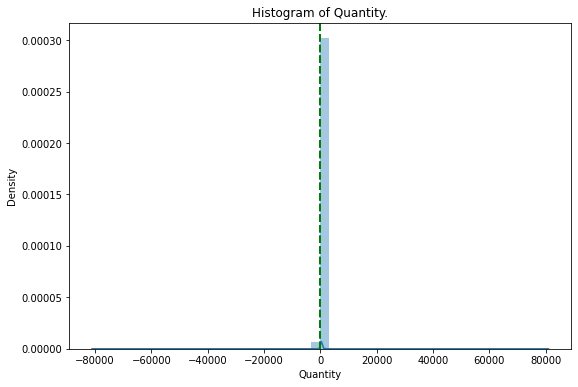

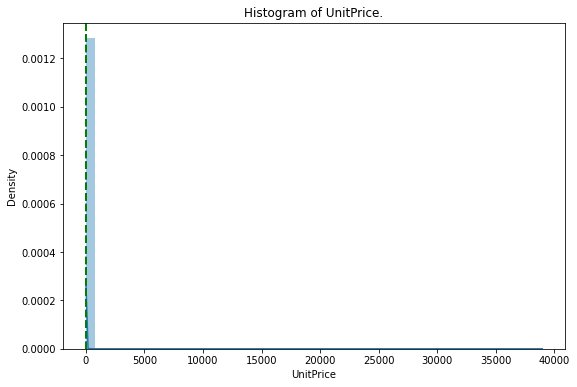

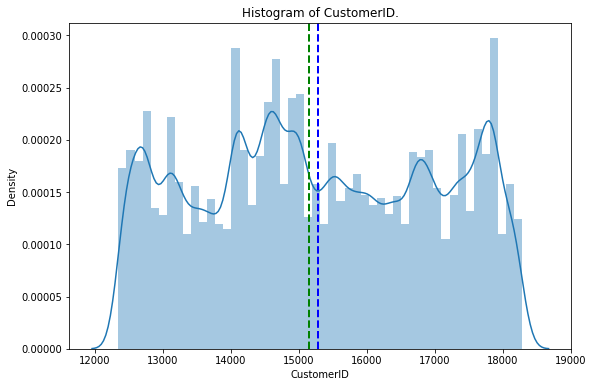

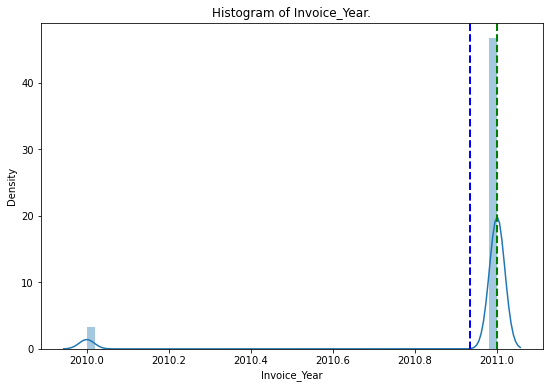

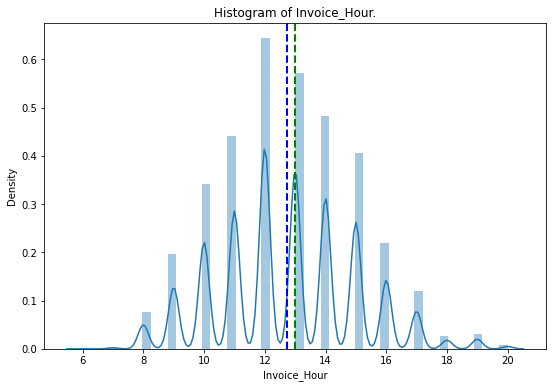

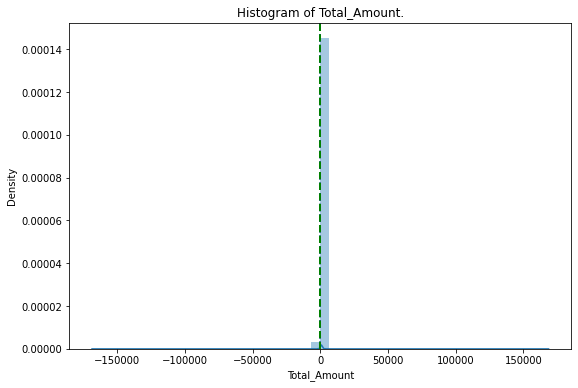

In [18]:
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature = (customer_data[col])
  sns.distplot(customer_data[col],ax = ax)
  ax.axvline(feature.mean(),color='blue', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='green', linestyle='dashed', linewidth=2)
  ax.set_title(f'Histogram of {col}.')
  plt.show()

### **CUSTOMERS**

In [19]:
#Top Customers ID
top_customers = pd.DataFrame(customer_data['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
top_customers.rename(columns = {'index':'CustomerID','CustomerID':'count'},inplace = True)
top_customers.head(5)

,CustomerID,count
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782


Text(0.5, 1.0, 'Top 5 Customers ID.')

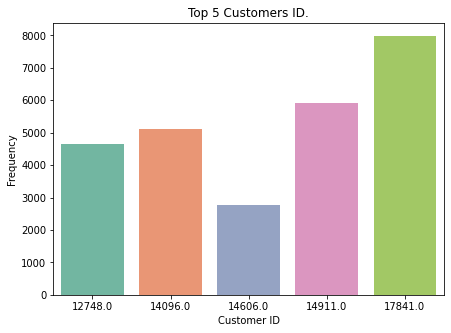

In [20]:
# Plotting top five customers 
plt.figure(figsize = (7,5))
sns.barplot(x = 'CustomerID',y = 'count',palette= 'Set2',data = top_customers[:5])
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.title("Top 5 Customers ID.")

In [21]:
customer_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Year', 'Invoice_Month',
       'Invoice_Day', 'Invoice_Hour', 'Total_Amount'],
      dtype='object')

### **COUNTRIES**

In [22]:
# dataframe from where most orders are placed
top_countries = pd.DataFrame(customer_data['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries.rename(columns = {'index':'Country','Country':'Total Counts'},inplace = True)
top_countries.head(5)

,Country,Total Counts
0,United Kingdom,361878
1,Germany,9495
2,France,8491
3,EIRE,7485
4,Spain,2533


In [23]:
# dataframe from where least orders are placed
bottom_countries = pd.DataFrame(customer_data['Country'].value_counts().sort_values(ascending = False).reset_index())
bottom_countries.rename(columns = {'index':'Country','Country':'Total Counts'},inplace = True)
bottom_countries.tail(5)

,Country,Total Counts
32,Lithuania,35
33,Brazil,32
34,Czech Republic,30
35,Bahrain,17
36,Saudi Arabia,10


Text(0.5, 1.0, 'Top 5 Countries.')

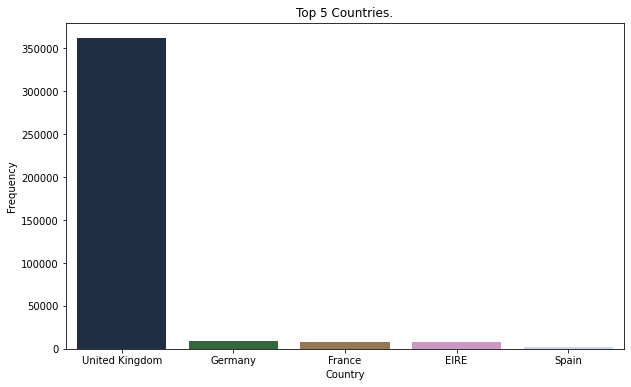

In [24]:
# Plotting top five Countries 
plt.figure(figsize = (10,6))
sns.barplot(x = 'Country',y = 'Total Counts',palette= 'cubehelix',data = top_countries[:5])
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title("Top 5 Countries.")

Text(0.5, 1.0, 'Bottom 5 Countries')

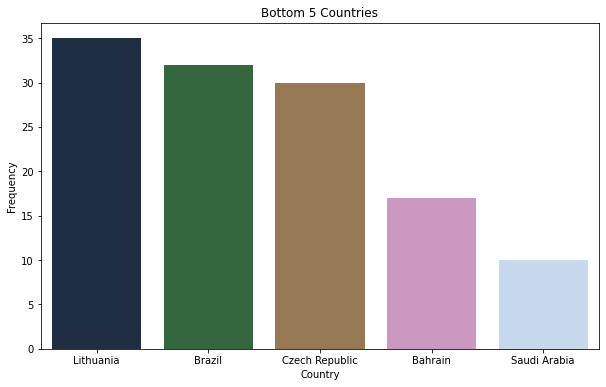

In [25]:
# Plotting bottom five Countries 
plt.figure(figsize = (10,6))
sns.barplot(x = 'Country',y = 'Total Counts',palette= 'cubehelix',data = top_countries[-5:])
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title("Bottom 5 Countries")

### **TOTAL PURCHASING IN YEARS**


In [26]:
# Creating dataframe for Invoice_Year
purchase_year = customer_data['Invoice_Year'].value_counts().sort_values(ascending = False).reset_index()
purchase_year.rename(columns = {'index':'Invoice_Year','Invoice_Year':'Frequency'},inplace = True)
purchase_year

,Invoice_Year,Frequency
0,2011,379979
1,2010,26850


Text(0.5, 1.0, 'Total Purchasing in Years.')

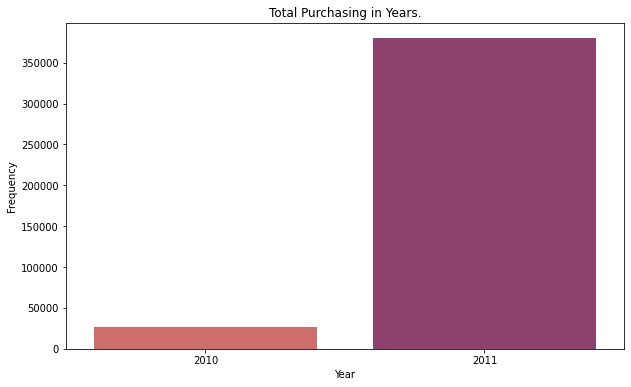

In [27]:
# Plotting total invoices with year
plt.figure(figsize = (10,6))
sns.barplot(x = 'Invoice_Year',y = 'Frequency',palette= 'flare',data = purchase_year)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title("Total Purchasing in Years.")

**It can easily be seen in the above barplot majority of the orders are placed in 2011.**

### **MONTHS**

In [28]:
# dataframe for Invoice_Months counts
top_months = pd.DataFrame(customer_data['Invoice_Month'].value_counts().sort_values(ascending = False).reset_index())
top_months.rename(columns = {'index':'Invoice_Month','Invoice_Month':'Total Frequency'},inplace = True)
top_months.head()

,Invoice_Month,Total Frequency
0,November,65598
1,October,50695
2,December,44511
3,September,40822
4,May,28908


Text(0.5, 1.0, 'Top 5 Purchasing Months.')

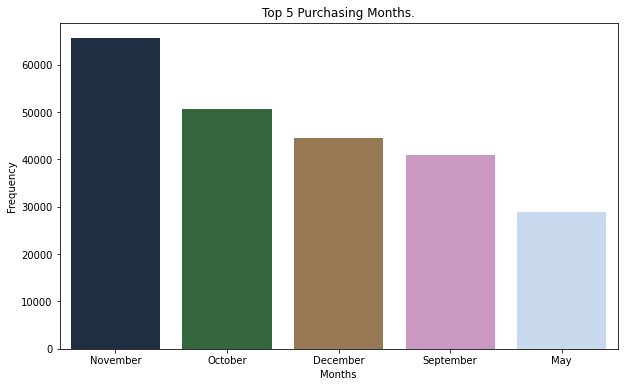

In [29]:
# Plotting top customers' purchasing in different five Months 
plt.figure(figsize = (10,6))
sns.barplot(x = 'Invoice_Month',y = 'Total Frequency',palette= 'cubehelix',data = top_months[:5])
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title("Top 5 Purchasing Months.")

**These are the months in which company is getting high purchasing orders from the customers.**

**There may be different insights of this graph, It may be possible that most of the festivals occur in these months like Halloween, New Year's Eve, Christmas Day, Christmas Eve etc.**

**This could be the reason of getting high sales.**

### **DAYS**

In [30]:
# Creating dataframe for Invoice_Days counts
top_days = pd.DataFrame(customer_data['Invoice_Day'].value_counts().sort_values(ascending = False).reset_index())
top_days.rename(columns = {'index':'Invoice_Day','Invoice_Day':'Total Frequency'},inplace = True)
top_days.head(5)

,Invoice_Day,Total Frequency
0,Thursday,82374
1,Wednesday,70599
2,Tuesday,68110
3,Monday,66382
4,Sunday,63237


Text(0.5, 1.0, 'Purchasing on different Days.')

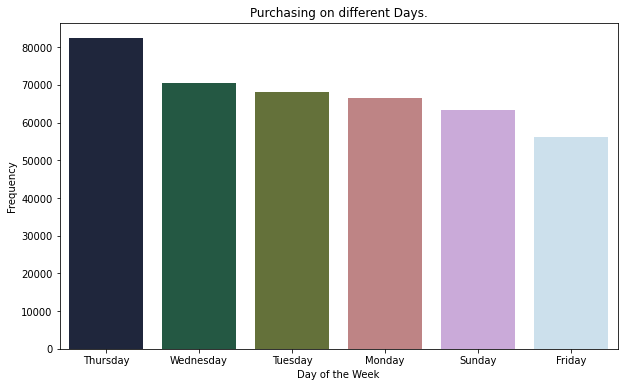

In [31]:
# Purchasings of customers on different days
plt.figure(figsize = (10,6))
sns.barplot(x = 'Invoice_Day',y = 'Total Frequency',palette= 'cubehelix',data = top_days)
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title("Purchasing on different Days.")

**Thursday, Wednesday, Tuesday and Monday among 7 days of week are getting maximum orders of products.**



```

```

### **HOURS**

In [32]:
# Creating dataframe for Invoice_Months counts
top_hours = pd.DataFrame(customer_data['Invoice_Hour'].value_counts().sort_values(ascending = False).reset_index())
top_hours.rename(columns = {'index':'Invoice_Hour','Invoice_Hour':'Total Frequency'},inplace = True)
top_hours.head(5)

,Invoice_Hour,Total Frequency
0,12,73342
1,13,65062
2,14,55075
3,11,50249
4,15,46220


Text(0.5, 1.0, 'Purchasing Hours.')

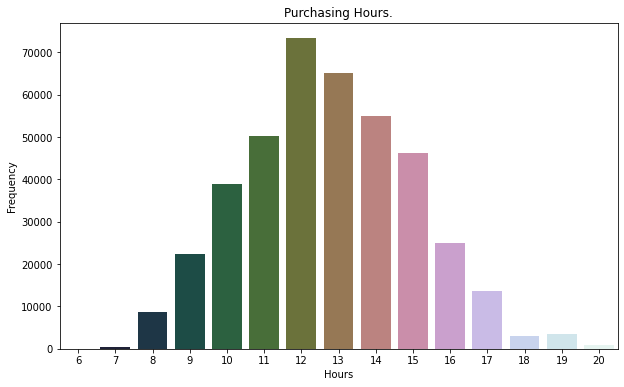

In [33]:
# Plotting purchases at different hours
plt.figure(figsize = (10,6))
sns.barplot(x = 'Invoice_Hour',y = 'Total Frequency',palette = 'cubehelix',data = top_hours)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title("Purchasing Hours.")

**From the above barplot it can be seen customers like to place order at the time in betweeen 10:00AM to 2:00PM.**

**There are very few orders in early in the morning and at midnight/night.**

### **PURCHASED PRODUCTS**

In [34]:
# Creating dataframe for descriptions of products
description_df = customer_data['Description'].value_counts().sort_values(ascending = False).reset_index()
description_df.rename(columns={'index': 'Product_Description','Description':'Frequency'}, inplace=True)
# Top five products
description_df.head()

,Product_Description,Frequency
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
1,REGENCY CAKESTAND 3 TIER,1905
2,JUMBO BAG RED RETROSPOT,1662
3,ASSORTED COLOUR BIRD ORNAMENT,1418
4,PARTY BUNTING,1416


In [35]:
#bottom five products
description_df.tail()

,Product_Description,Frequency
3891,NEW BAROQUE B'FLY NECKLACE CRYSTAL,1
3892,GLASS AND PAINTED BEADS BRACELET OL,1
3893,GLASS AND BEADS BRACELET IVORY,1
3894,CROCHET LILAC/RED BEAR KEYRING,1
3895,PINK BAROQUE FLOCK CANDLE HOLDER,1


Text(0.5, 1.0, 'Top Five Products.')

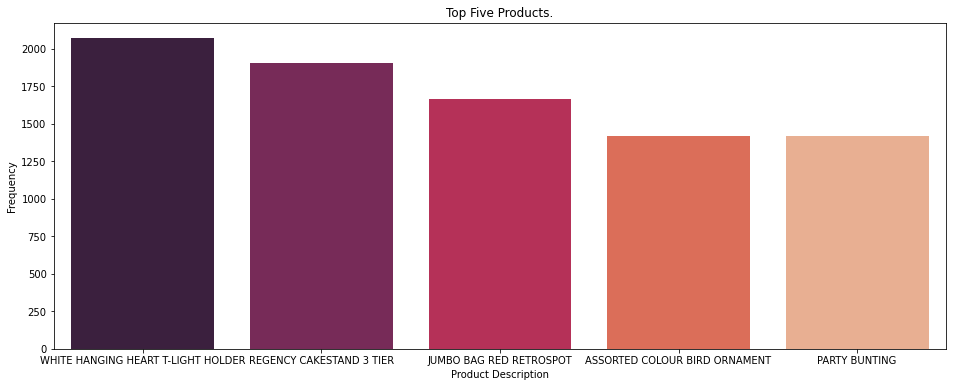

In [36]:
# Plotting the top five products purchasing
plt.figure(figsize = (16,6))
sns.barplot(x = 'Product_Description',y = 'Frequency',palette = 'rocket',data = description_df[:5])
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.title("Top Five Products.")

These are the top five products which are getting maximum number of invoices:
* WHITE HANGING HEART T-LIGHT HOLDER
* REGENCY CAKESTAND 3 TIER
* JUMBO BAG RED RETROSPOT
* ASSORTED COLOUR BIRD ORNAMENT
* PARTY BUNTING

Text(0.5, 1.0, 'Bottom Five Products.')

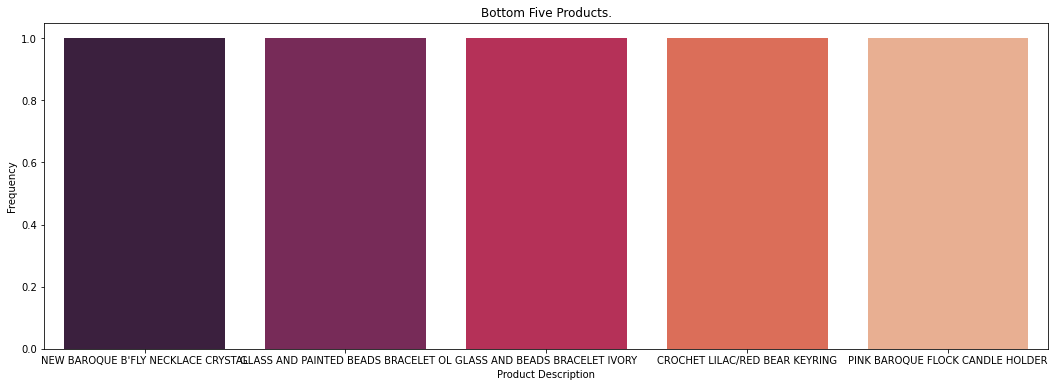

In [37]:
# Bottom five products
# Plotting the top five products purchasing
plt.figure(figsize = (18,6))
sns.barplot(x = 'Product_Description',y = 'Frequency',palette = 'rocket',data = description_df[-5:])
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.title("Bottom Five Products.")

### **TOTAL AMOUNT**

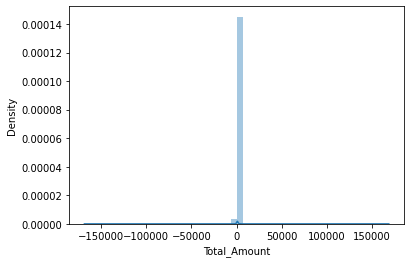

In [38]:
sns.distplot(customer_data['Total_Amount'])

In [39]:
# get rid of the negative amounts
total_amount_df = customer_data[customer_data['Total_Amount']>0]

Text(0.5, 1.0, 'Distribution of Total Amount')

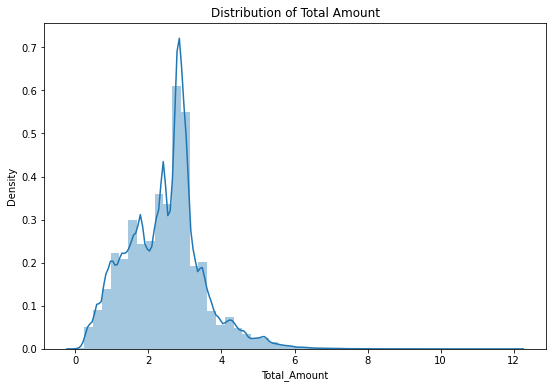

In [40]:
# Distribution of total amounts
plt.figure(figsize = (9,6))
sns.distplot(np.log1p(total_amount_df['Total_Amount']))
plt.title('Distribution of Total Amount')

---
# **RFM MODEL (Recency, Frequency, Monetary Value)**
### Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors.
* Recency: Customers who made purchases recently.
* Frequency: How often a customer makes a purchase.
* Monetary Value: How much money a customer spends on.

#### Performing RFM Segmentation and RFM Analysis, Step by Step 
* The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. 
* The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).





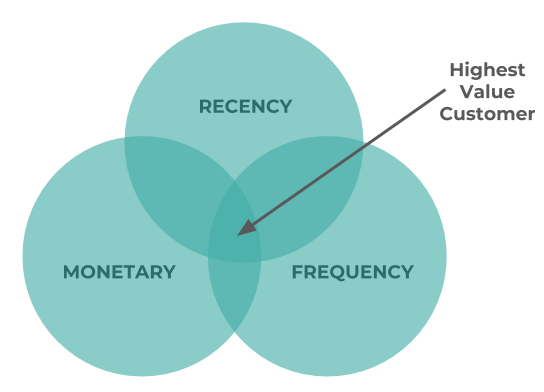

### **RECENCY**


In [41]:
customer_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00


In [42]:
# Removing cancelled orders from the InvoiceNo 
customer_data['InvoiceNo'] = customer_data['InvoiceNo'].astype('str')
customer_data = customer_data[~customer_data['InvoiceNo'].str.contains('C')]

In [43]:
# creating column for only date
customer_data['Invoice_Date'] = customer_data['InvoiceDate'].dt.date
snapshot_date = max(customer_data.InvoiceDate) + dt.timedelta(days=1)
# Creating dataframe to record RFM score
RFM_df = customer_data.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total_Amount': 'sum'}).reset_index()
# Renaming columns
RFM_df.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'Total_Amount': 'MonetaryValue'}, inplace=True)

In [44]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [45]:
RFM_df.head(10)

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40
5,12352.0,36,85,2506.04
6,12353.0,204,4,89.00
7,12354.0,232,58,1079.40
8,12355.0,214,13,459.40
9,12356.0,23,59,2811.43


#### **RECENCY DISTRIBUTION PLOT**


Text(0.5, 1.0, 'Recency Distribution Plot')

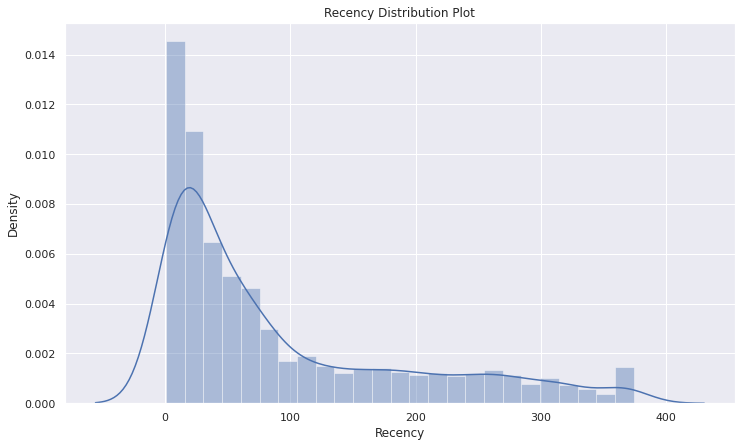

In [46]:
# distribution plot for recency of customers
plt.figure(figsize = (12,7))
sns.set()
sns.distplot(RFM_df.Recency)
plt.title('Recency Distribution Plot')

### **FREQUENCY DISTRIBUTION PLOT**

Text(0.5, 1.0, 'Frequency Distribution Plot')

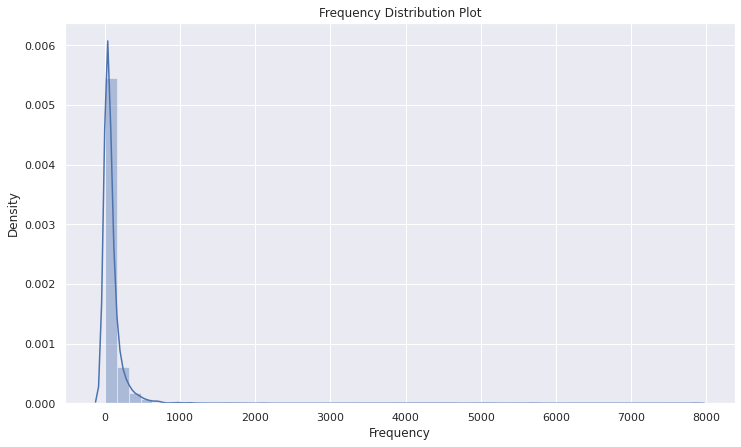

In [47]:
# distplot of Frequency of customers' purchasing
plt.figure(figsize = (12,7))
sns.set()
sns.distplot(RFM_df.Frequency)
plt.title('Frequency Distribution Plot')

### **MONETARY DISTRIBUTION PLOT**

Text(0.5, 1.0, 'Monetary Distribution Plot')

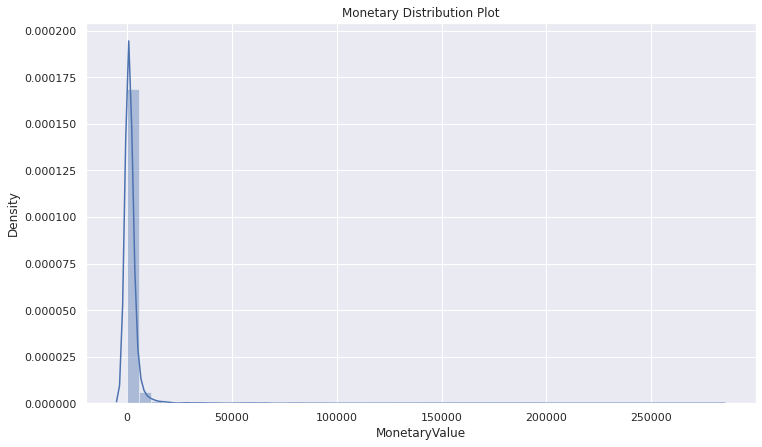

In [48]:
# distplot of Monetary value
plt.figure(figsize = (12,7))
sns.set()
sns.distplot(RFM_df.MonetaryValue)
plt.title('Monetary Distribution Plot')

Text(0.5, 1.0, 'RFM Correlation')

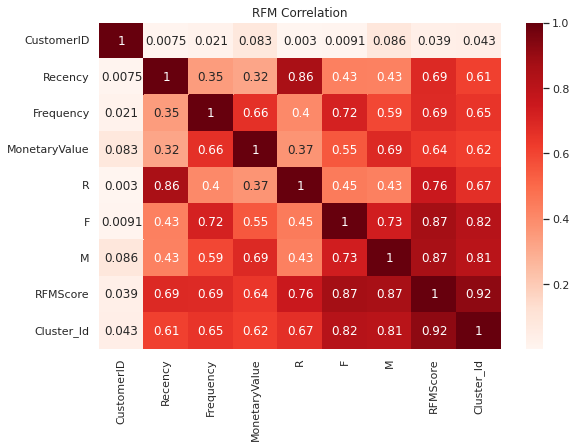

In [81]:
# Correlation mapping between RFM df
rfm_correlation = RFM_df.corr()
# correlation between of Recency, Frequency and MonetaryValue
plt.figure(figsize = (9,6))
sns.heatmap(abs(rfm_correlation), cmap = 'Reds', annot = True)
plt.title('RFM Correlation')

### **SPLITTING INTO FOUR SEGMENTS USING QUANTILES**

In [50]:
# Split into four segments using quantiles
quantiles = RFM_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles       

{'CustomerID': {0.25: 13812.5, 0.5: 15299.0, 0.75: 16778.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'MonetaryValue': {0.25: 307.245, 0.5: 674.45, 0.75: 1661.64},
 'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.0}}

In [51]:
# Functions to create R,F and M segments
def RScoring(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4
def FnMScoring(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [52]:
# Calculate and addd R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFM_df['R'] = RFM_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFM_df['F'] = RFM_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFM_df['M'] = RFM_df['MonetaryValue'].apply(FnMScoring, args=('MonetaryValue',quantiles,))
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M
0,12346.0,326,1,77183.60,4,4,1
1,12347.0,2,182,4310.00,1,1,1
2,12348.0,75,31,1797.24,3,3,1
3,12349.0,19,73,1757.55,2,2,1
4,12350.0,310,17,334.40,4,4,3


In [53]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFM_df['RFMScore'] = RFM_df[['R', 'F', 'M']].sum(axis = 1)
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore
0,12346.0,326,1,77183.60,4,4,1,9
1,12347.0,2,182,4310.00,1,1,1,3
2,12348.0,75,31,1797.24,3,3,1,7
3,12349.0,19,73,1757.55,2,2,1,5
4,12350.0,310,17,334.40,4,4,3,11


In [54]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFM_df['RFMGroup'] = RFM_df.R.map(str) + RFM_df.F.map(str) + RFM_df.M.map(str)
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore,RFMGroup
0,12346.0,326,1,77183.60,4,4,1,9,441
1,12347.0,2,182,4310.00,1,1,1,3,111
2,12348.0,75,31,1797.24,3,3,1,7,331
3,12349.0,19,73,1757.55,2,2,1,5,221
4,12350.0,310,17,334.40,4,4,3,11,443


## **Interpretation**

**RFMScore**: It is the sum of R, F and M value that assigned by quantiles.

**RFMGroup**: This is the combination of R,F, and M values.

For example:

A customer ordered a product 300 days ago, arrived on Online retail platform just once and bought 10$ dollar worth product. According to RFM table he got R = 4(Recency is very low), F = 4(Frequency is very low because he arrived just once) and M = 4(Monetary value is very low). So, the RFMGroup value become 444 means he is the worst customer, we don't need to spend more time on him.

Those customer are the best customers who scored R = 1, F = 1 or 2 and M = 1 or 2 means in combination it will give RFMGroup 111,112,121 values like these are good indications.




### **REMOVING OUTLIERS**
#### For removing outliers we are going to use IQR(Inter Quantile Range)

$$IQR = Q3 - Q1$$

In [55]:
# Outlier treatment
rfm = ['Recency','Frequency','MonetaryValue']
for col in rfm:
  Q1 = RFM_df[col].quantile(0.05)
  Q3 = RFM_df[col].quantile(0.95)
  IQR = Q3 - Q1
  RFM_df = RFM_df [(RFM_df[col] >= Q1 - 1.5*IQR) & (RFM_df[col] <= Q3 + 1.5*IQR)]

In [56]:
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore,RFMGroup
1,12347.0,2,182,4310.00,1,1,1,3,111
2,12348.0,75,31,1797.24,3,3,1,7,331
3,12349.0,19,73,1757.55,2,2,1,5,221
4,12350.0,310,17,334.40,4,4,3,11,443
5,12352.0,36,85,2506.04,2,2,1,5,221


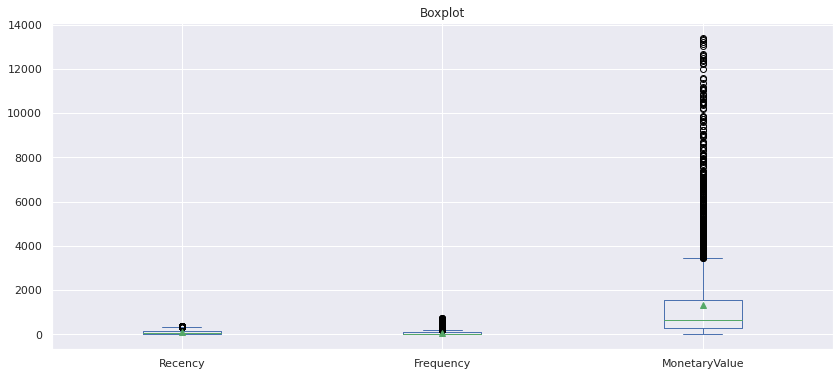

In [57]:
# Checking outliers through Boxplot 
plt.rcParams['figure.figsize']=(14,6)
ax = RFM_df[["Recency","Frequency","MonetaryValue"]].plot(kind='box', title='Boxplot', showmeans=True)
plt.show()

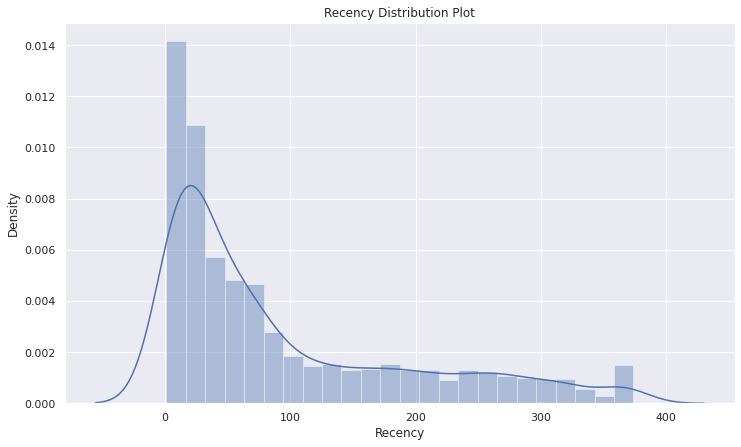

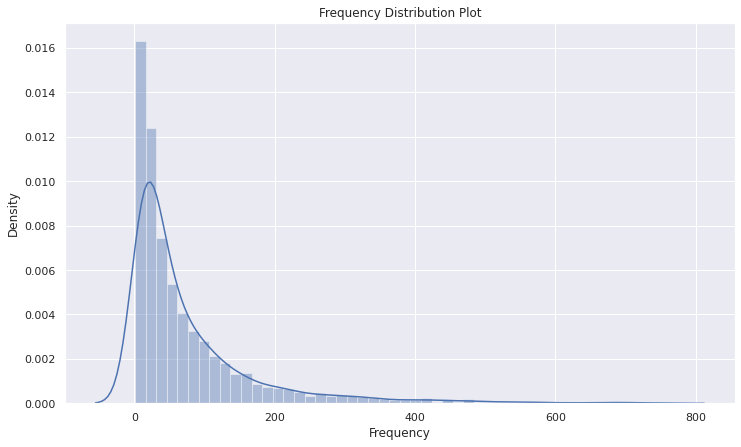

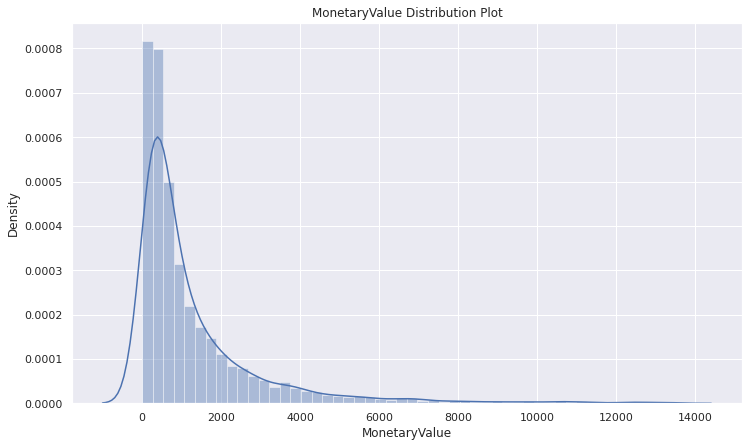

In [58]:
# Now let's check the distribution of Recency , Frequency and MonetaryValue
for col in rfm:
  plt.figure(figsize = (12,7))
  sns.set()
  sns.distplot(RFM_df[col])
  plt.title(f'{col} Distribution Plot')

Now, it can be seen we've get rid of the most of outliers in RFM df.

**All the RFM feature distributions are right skewed or positively skewed.**

### Let's check the top customers' list on the basis of RFM Score and RFMGroup value

In [59]:
# Top customers who frequent in all features
print(RFM_df[RFM_df['RFMScore'] == 3].sort_values('RFMScore', ascending = False).reset_index().head(10))
RFM_df[RFM_df['RFMScore'] == 3].shape

   index  CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RFMScore  \
0      1     12347.0        2        182        4310.00  1  1  1         3   
1     15     12362.0        3        266        5226.23  1  1  1         3   
2   2981     16407.0       13        172        2126.93  1  1  1         3   
3   2975     16401.0        1        186        4098.32  1  1  1         3   
4   2969     16393.0        2        330        3046.21  1  1  1         3   
5   2960     16379.0        4        108        2157.40  1  1  1         3   
6   2944     16360.0        5        662        3512.53  1  1  1         3   
7   2942     16358.0        1        109        2027.50  1  1  1         3   
8   2919     16327.0       14        319        3844.22  1  1  1         3   
9   2918     16326.0        6        319        3110.96  1  1  1         3   

  RFMGroup  
0      111  
1      111  
2      111  
3      111  
4      111  
5      111  
6      111  
7      111  
8      111  
9      111 

(384, 9)

### **There are 384 customers who are the best for the our business, so we need to make plans to make them happy because these are the elite ones.**

They scored best in:

* Recency(These are the ones who visit recently)
* Frequency(These are the ones who purchased most frequently)
* Monetary(Comapany make plethora of money)

### **The second top list on the basis of RFM Score of customers**

In [60]:
# Second top customers who frequent in all features
print(RFM_df[(RFM_df['RFMScore'] > 3) & (RFM_df['RFMScore'] <= 5)].sort_values('RFMGroup', ascending = False).reset_index().head(10))
RFM_df[(RFM_df['RFMScore'] > 3) &(RFM_df['RFMScore'] <= 5)].shape

   index  CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RFMScore  \
0   2115     15228.0       66        125        3386.71  3  1  1         5   
1   2448     15674.0       73        114        2446.60  3  1  1         5   
2   1610     14535.0       60        330        2864.19  3  1  1         5   
3    441     12916.0      139        107        3006.15  3  1  1         5   
4   1634     14565.0       96        127        3099.12  3  1  1         5   
5   1683     14639.0       52        172        2984.49  3  1  1         5   
6   1827     14841.0       53        138        3295.76  3  1  1         5   
7   1829     14844.0       64        130        3189.81  3  1  1         5   
8    393     12843.0       66        103        1702.26  3  1  1         5   
9   1834     14852.0       58        143        2836.69  3  1  1         5   

  RFMGroup  
0      311  
1      311  
2      311  
3      311  
4      311  
5      311  
6      311  
7      311  
8      311  
9      311 

(802, 9)

### **There are 802 customers who are the second best customers for the our business, we need some strategy to make them top customers.**

#### **DATA PREPARATION**


In [61]:
Log_rfm_Data = RFM_df[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log1p, axis = 1)

In [62]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler
rfm_features = ['Recency', 'Frequency', 'MonetaryValue']
final_rfm = Log_rfm_Data[rfm_features].values
sc = StandardScaler()
X = sc.fit_transform(final_rfm)


# **MODELING**



## **K-Means Clustering Algorithm**

In [63]:
from sklearn.cluster import KMeans

# applying K-means clustering
clusterer = KMeans(n_clusters=3,max_iter=1000, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[2 1 2 ... 0 2 1]


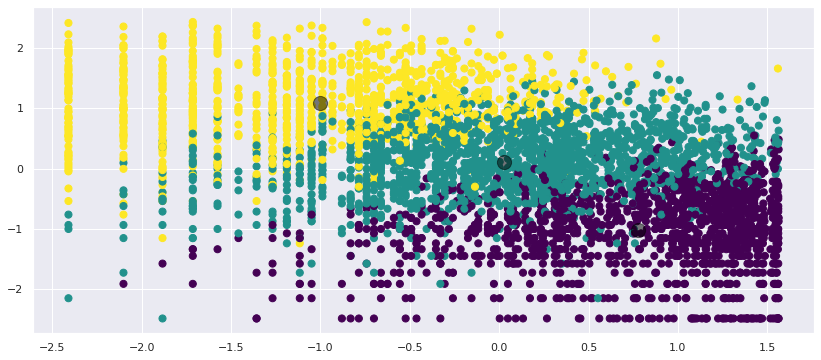

In [64]:
# plotting clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')

centers = clusterer.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [65]:
clusterer.cluster_centers_

array([[ 0.77616338, -1.01852553, -0.97578844],
       [ 0.02840204,  0.11143614,  0.05427312],
       [-1.00093609,  1.09114147,  1.1238352 ]])

In [66]:
# assign the label
RFM_df['Cluster_Id'] =cluster_labels[0:4256]
print(RFM_df.head(6))

   CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RFMScore RFMGroup  \
1     12347.0        2        182        4310.00  1  1  1         3      111   
2     12348.0       75         31        1797.24  3  3  1         7      331   
3     12349.0       19         73        1757.55  2  2  1         5      221   
4     12350.0      310         17         334.40  4  4  3        11      443   
5     12352.0       36         85        2506.04  2  2  1         5      221   
6     12353.0      204          4          89.00  4  4  4        12      444   

   Cluster_Id  
1           2  
2           1  
3           2  
4           0  
5           2  
6           0  


In [67]:
# grouping clusters on the basis of their cluster label
RFM_df.groupby('Cluster_Id').mean()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore
Cluster_Id,,,,,,,,
0,15392.568488,177.464869,14.195174,277.525253,3.388219,3.674237,3.621008,10.683463
1,15302.881176,74.654118,54.441176,897.878566,2.495882,2.411176,2.454118,7.361176
2,15198.358326,20.083697,186.490846,3195.598614,1.451613,1.316478,1.299913,4.068003


### **From the above table we can infer**
* Cluster 0 comprises that these are the group of customers of whom Recency is very low, frequencies are very less and Company is generating only few bucks.
* Cluster 1 comprises that this cluster give the insights that these are marked with less frequency but more frequent than cluster 0 and company is making more money than cluster 0.
* Cluster 2 comprises that it gives the information that these are one who visits more, they are more frequent and they are helping to generate a lot of business.

**Among the three clusters, we need focus more on the customers of Cluster_Id 2.**

In [68]:
# Number of customers belonging to each cluster
RFM_df['Cluster_Id'].value_counts()

1    1700
0    1409
2    1147
Name: Cluster_Id, dtype: int64

## **K-Means Clustering with Silhoutte Analysis**

In [69]:
# importing silhoutte
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


In [70]:
range_of_clusters = [2,3,4,5,7,8,10]

For n_clusters = 2, The average silhouette_score is :0.3980102073446338.
For n_clusters = 3, The average silhouette_score is :0.2962529539347942.
For n_clusters = 4, The average silhouette_score is :0.3048474761096056.
For n_clusters = 5, The average silhouette_score is :0.2795932252612818.
For n_clusters = 7, The average silhouette_score is :0.26627686634329506.
For n_clusters = 8, The average silhouette_score is :0.2588175073904285.
For n_clusters = 10, The average silhouette_score is :0.2720877780065119.


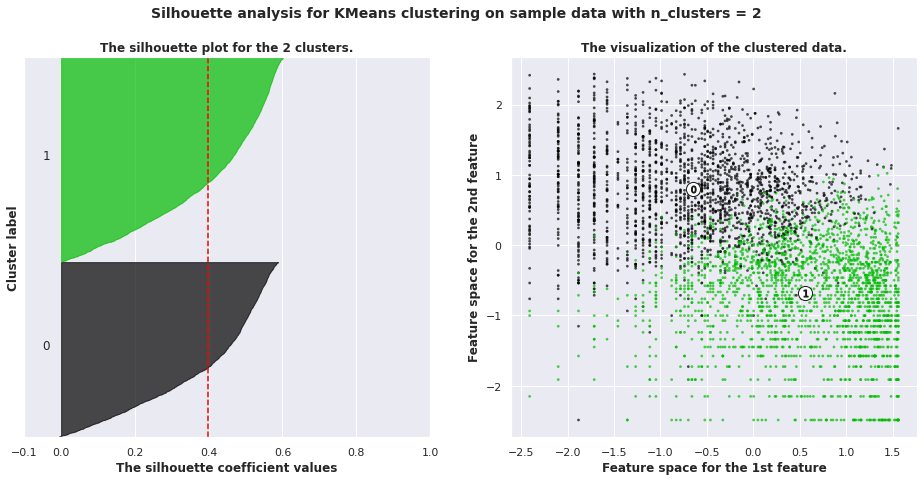

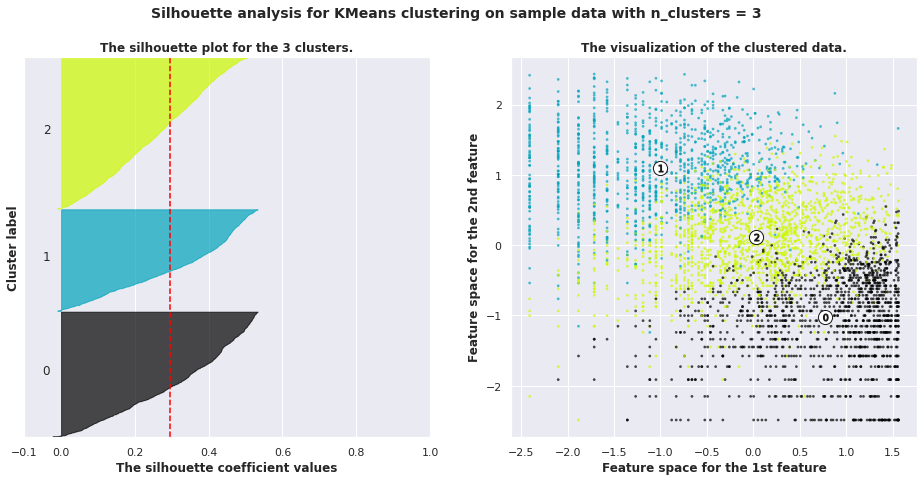

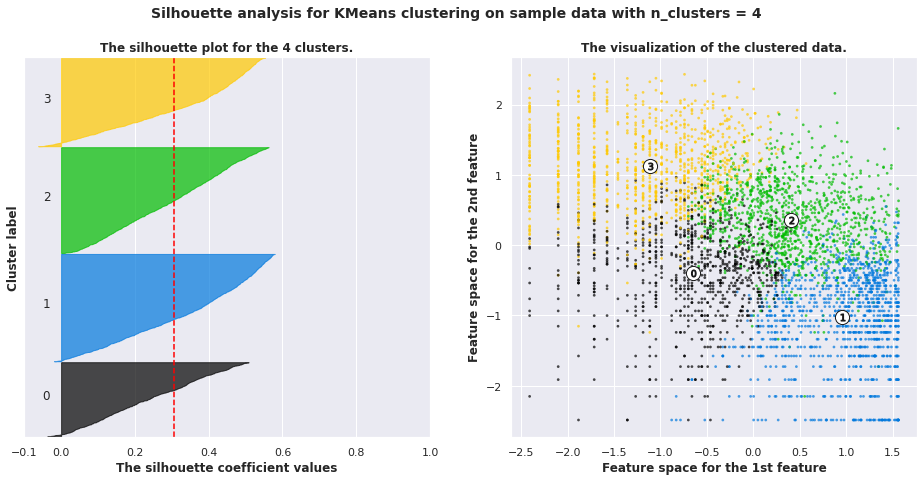

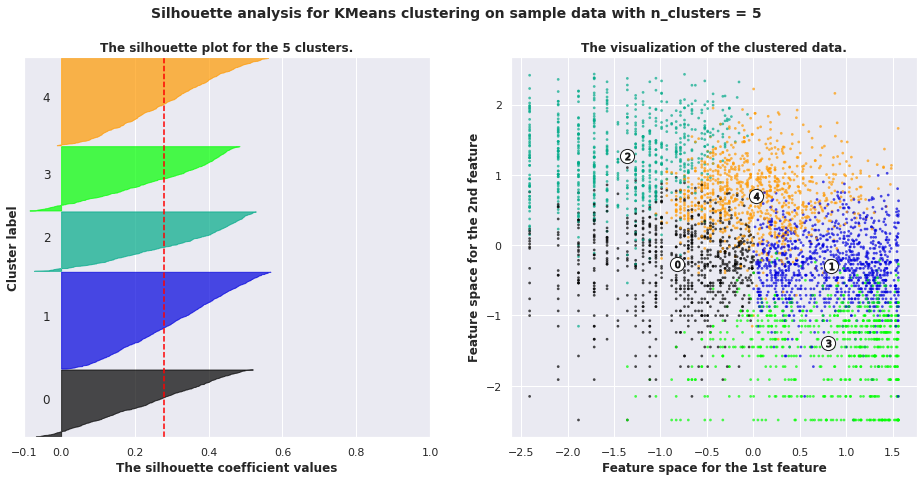

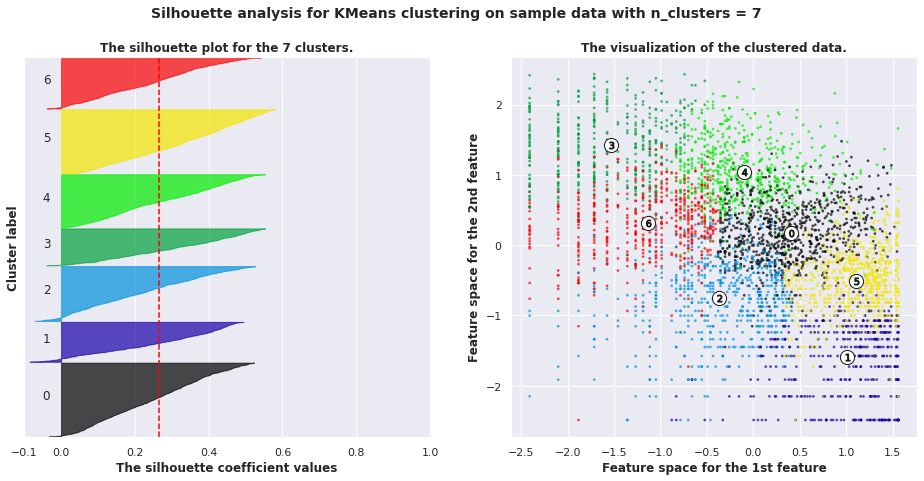

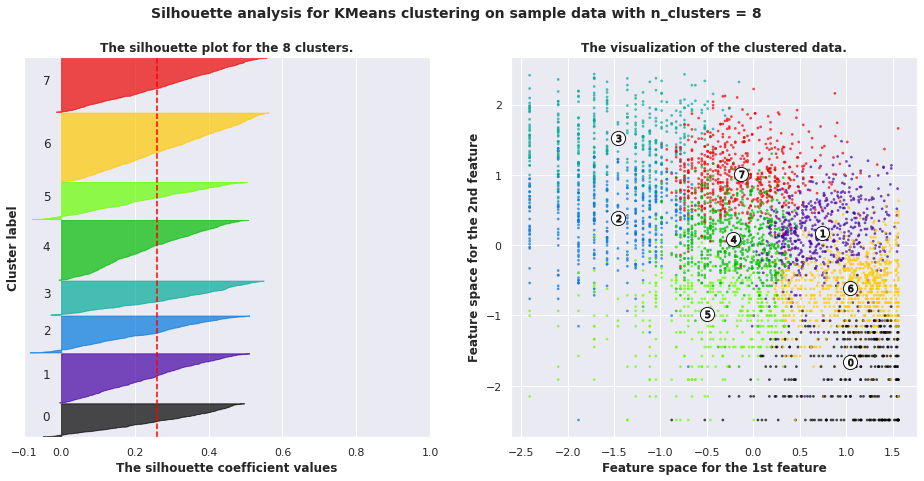

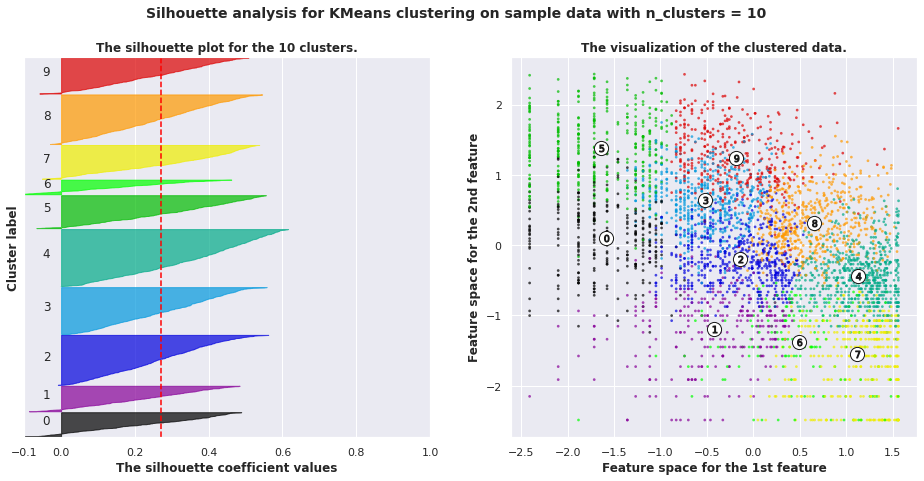

In [71]:
for n_clusters in range_of_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state= 1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is :{silhouette_avg}.")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for the {n_clusters} clusters.",fontweight = 'bold')
    ax1.set_xlabel("The silhouette coefficient values",fontweight = 'bold')
    ax1.set_ylabel("Cluster label", fontweight = 'bold')

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.",fontweight = 'bold')
    ax2.set_xlabel("Feature space for the 1st feature",fontweight = 'bold')
    ax2.set_ylabel("Feature space for the 2nd feature",fontweight = 'bold')

    plt.suptitle((f'Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}'),
                 fontsize=14, fontweight='bold')

plt.show()


**For n_clusters = 2, the Silhoutte Score is around 0.40, which meansneighouring clusters are away from each other and there are less chances for assigning the customers into wrong clusters.**



## **K-Means Clustering with Elbow Method**

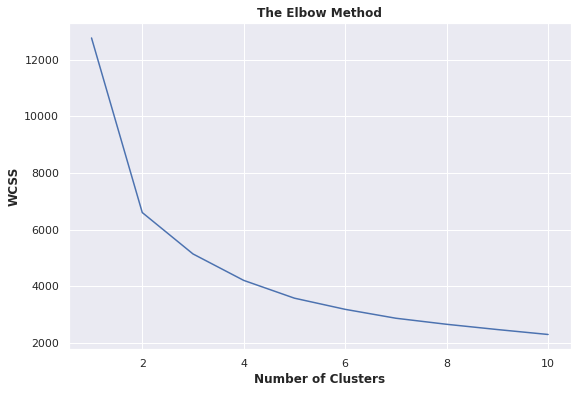

In [72]:
# within cluster sum of squares
wcss = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plotting Elbow plot to identify the better clusters

plt.figure(figsize = (9,6))
plt.grid(True)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontweight = 'bold')
plt.xlabel('Number of Clusters',fontweight = 'bold')
plt.ylabel('WCSS', fontweight = 'bold')
plt.show()

*   **To Choose a better cluster size, it should have minimun WCSS value.**

*   **From the above, we can see that 4 seems to be a good cluster size as it has lower WCSS value compared to others**
*   **If we go further, there is a slight downfall in WCSS value. So 4 is a good cluster size.** **











# **Summary**

In [73]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
my_pretty_table = PrettyTable(['Sr. No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
my_pretty_table.add_row(['1','K-Means','RFM',"3"])
my_pretty_table.add_row(['2',"K-Means with silhouette_score ", "RFM", "2"]) 
my_pretty_table.add_row(['3',"K-Means with Elbow method  ", "RFM", "4"])
print(my_pretty_table)

+---------+--------------------------------+------+---------------------------+
| Sr. No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+---------+--------------------------------+------+---------------------------+
|    1    |            K-Means             | RFM  |             3             |
|    2    | K-Means with silhouette_score  | RFM  |             2             |
|    3    |  K-Means with Elbow method     | RFM  |             4             |
+---------+--------------------------------+------+---------------------------+


# **Conclusion**







*   Missing and duplicate values were found.
*   Most of the purchases are from United Kingdom followed by Germany, France, Ireland and Spain.
*   Most of the customers purchased items on Thursday, Wednesday, Tuesday.
*   Most of the customers purchased items in the month of November, October, December, and the least number of purchases in April, January, February.
*   Most of the customers start their purchase from 10:00 A.M till 2:00 P.M & the 12th hour of the day is the peak for purchasing. After 2:00 P.M the purchasing frequency gradually reduces.
* Top Five purchased products on the basis of their frequency:
   - WHITE HANGING HEART T-LIGHT HOLDER
   * REGENCY CAKESTAND 3 TIER
   * JUMBO BAG RED RETROSPOT
   * ASSORTED COLOUR BIRD ORNAMENT
   * PARTY BUNTING
*   RFM (Recency, Frequency and Monetary) analysis of the data was carried out to understand the behaviour of the customer and the market, as it makes easy to recommend and display newly launched products to the customers and understand their choices.

*   Applied Clustering Algorithms:
 * **K-Means Clustering** - Optimal number of Clusters (**3**)
 * **K-Means with Silhoutte Analysis** - Optimal number of  Clusters (**2**)
 * **K-Means with Elbow Method** - Optimal number of Clusters (**4**)



















